In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [21]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [22]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [23]:
from llm_toolkit.logical_reasoning_utils import *

In [24]:
model_name = "Qwen2.5-3B-Instruct"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [25]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   text                                                      3000 non-null   object
 1   label                                                     3000 non-null   object
 2   title                                                     3000 non-null   object
 3   puzzle                                                    3000 non-null   object
 4   truth                                                     3000 non-null   object
 5   qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.bfloat16_lf  3000 non-null   object
 6   qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.bfloat16_lf  3000 non-null   object
 7   qwen/Qwen2.5-3B-Instruct/checkpoint-88_torch.bfloat16_lf  3000 non-null   object
 8   Qwen/Qwen2.5-3B-Instruct/shot

In [26]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.bfloat16_lf',
 'qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.bfloat16_lf',
 'qwen/Qwen2.5-3B-Instruct/checkpoint-88_torch.bfloat16_lf',
 'Qwen/Qwen2.5-3B-Instruct/shots-00']

In [27]:
perf_df = get_metrics_df(df)
perf_df

columns: ['qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.bfloat16_lf', 'qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.bfloat16_lf', 'qwen/Qwen2.5-3B-Instruct/checkpoint-88_torch.bfloat16_lf']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:474: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


epoch                model  \
0    0.0  Qwen2.5-3B-Instruct   
1    0.2  Qwen2.5-3B-Instruct   
2    0.4  Qwen2.5-3B-Instruct   

                                                 run  accuracy  precision  \
0  qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.b...  0.703333   0.749369   
1  qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.b...  0.664000   0.749087   
2  qwen/Qwen2.5-3B-Instruct/checkpoint-88_torch.b...  0.674333   0.759168   

     recall        f1  ratio_valid_classifications  
0  0.703333  0.719658                          1.0  
1  0.664000  0.695454                          1.0  
2  0.674333  0.706938                          1.0

0.0: qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.bfloat16_lf
0.2: qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.bfloat16_lf
0.4: qwen/Qwen2.5-3B-Instruct/checkpoint-88_torch.bfloat16_lf


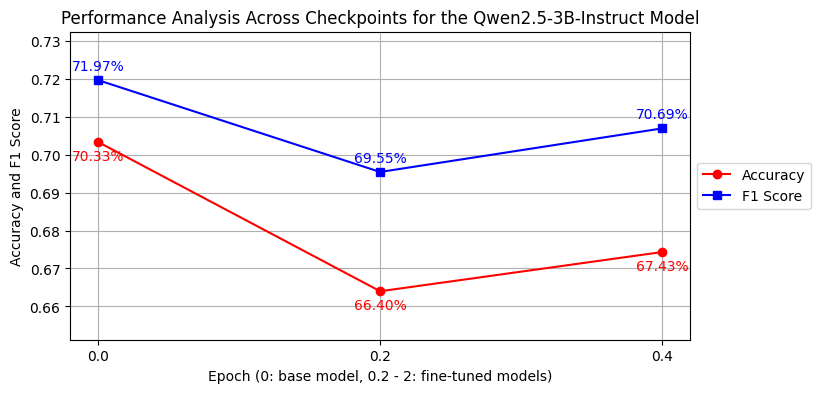

In [28]:
plot_metrics(perf_df, model_name)

In [29]:
perf_df.to_csv(metrics_csv, index=False)

In [30]:
perf_df_shots = get_metrics_df(df, variant="shots")
perf_df_shots

columns: ['Qwen/Qwen2.5-3B-Instruct/shots-00']


/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:474: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


shots                model                                run  accuracy  \
0     0  Qwen2.5-3B-Instruct  Qwen/Qwen2.5-3B-Instruct/shots-00  0.579667   

   precision    recall        f1  ratio_valid_classifications  
0    0.69665  0.579667  0.550637                          1.0

0: Qwen/Qwen2.5-3B-Instruct/shots-00


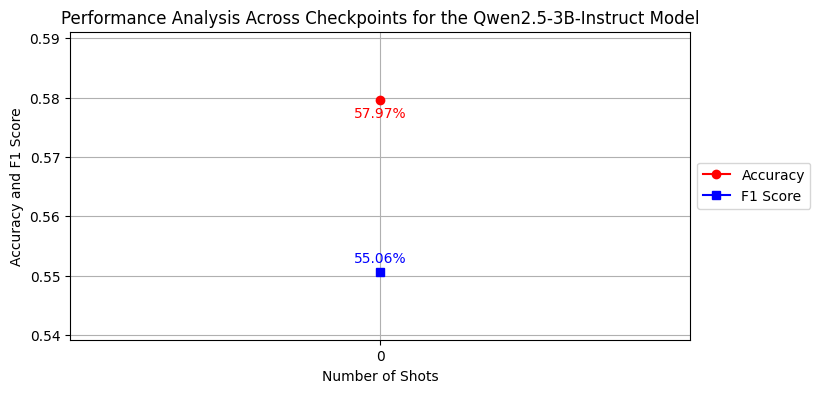

In [31]:
plot_metrics(perf_df_shots, model_name, variant="shots")

In [32]:
perf_df_shots.to_csv(
    metrics_csv.replace("metrics.csv", "shots_metrics.csv"), index=False
)

********** qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.bfloat16_lf **********
qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.bfloat16_lf
不是      1410
是       1173
不重要      389
回答正确      16
问法错误      12
Name: count, dtype: int64


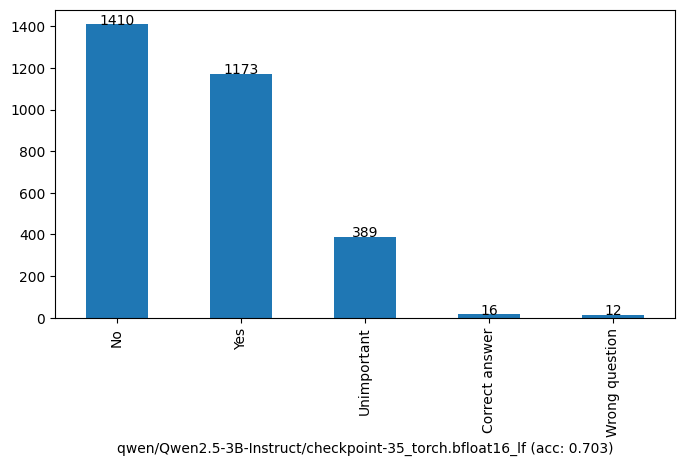

********** qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.bfloat16_lf **********
qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.bfloat16_lf
不是      1229
是       1164
不重要      551
回答正确      28
问法错误      28
Name: count, dtype: int64


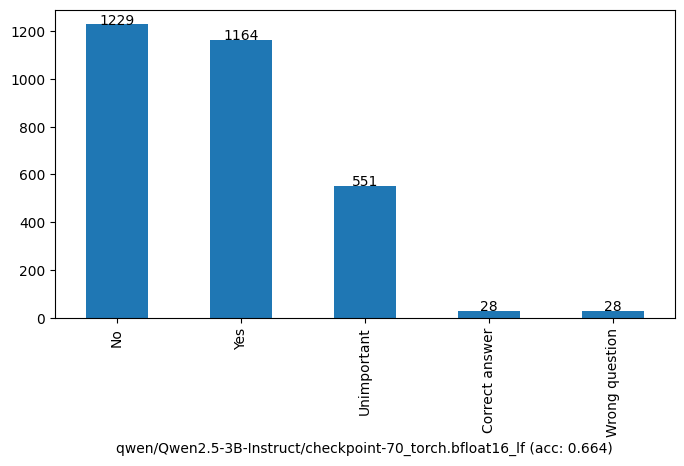

********** qwen/Qwen2.5-3B-Instruct/checkpoint-88_torch.bfloat16_lf **********
qwen/Qwen2.5-3B-Instruct/checkpoint-88_torch.bfloat16_lf
不是      1258
是       1147
不重要      533
问法错误      36
回答正确      26
Name: count, dtype: int64


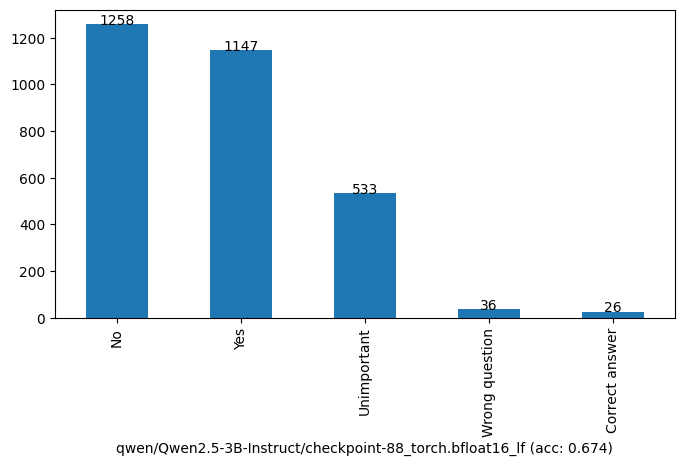

In [33]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, title=f"{col} (acc: {accuracy:.3f})")

********** qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.bfloat16_lf **********
qwen/Qwen2.5-3B-Instruct/checkpoint-35_torch.bfloat16_lf
不是      1410
是       1173
不重要      389
回答正确      16
问法错误      12
Name: count, dtype: int64


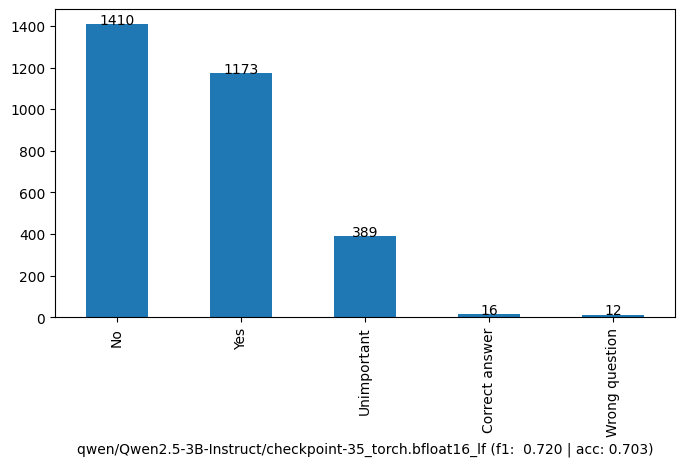

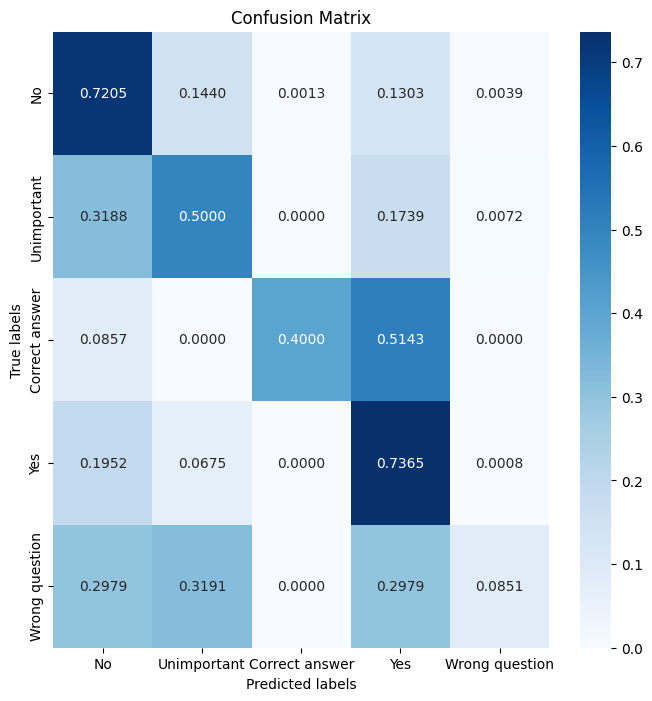

********** qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.bfloat16_lf **********
qwen/Qwen2.5-3B-Instruct/checkpoint-70_torch.bfloat16_lf
不是      1229
是       1164
不重要      551
回答正确      28
问法错误      28
Name: count, dtype: int64


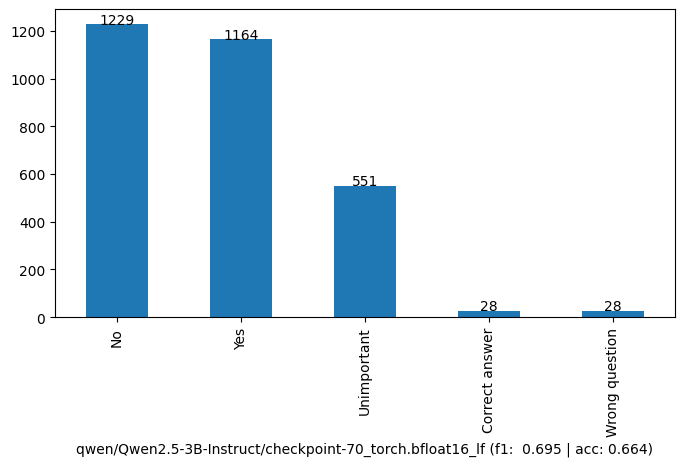

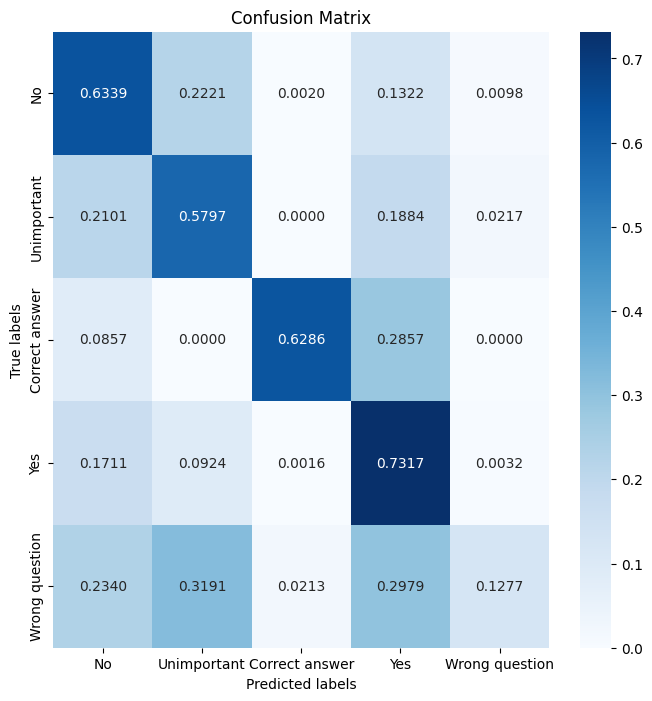

********** qwen/Qwen2.5-3B-Instruct/checkpoint-88_torch.bfloat16_lf **********
qwen/Qwen2.5-3B-Instruct/checkpoint-88_torch.bfloat16_lf
不是      1258
是       1147
不重要      533
问法错误      36
回答正确      26
Name: count, dtype: int64


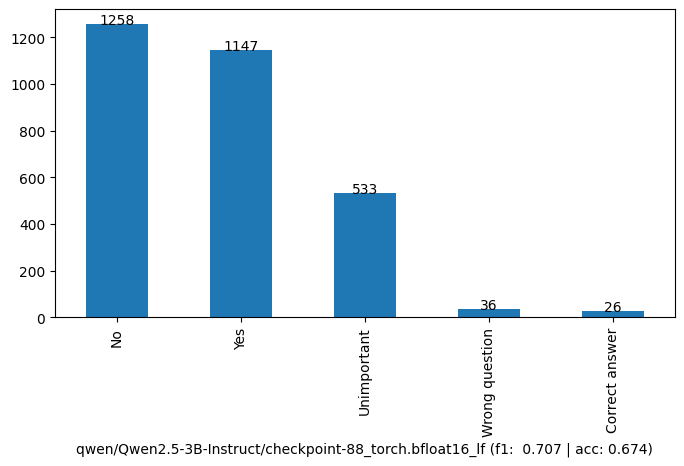

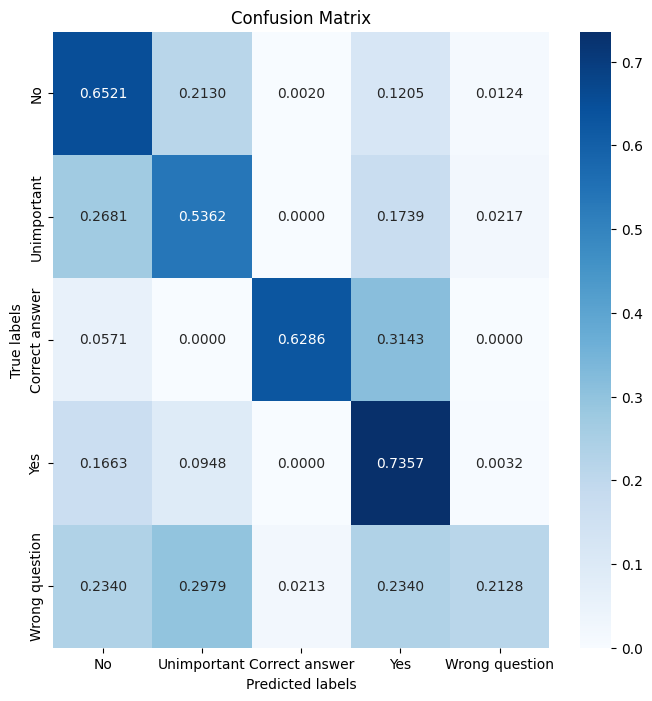

In [34]:
for col, f1, accuracy in zip(
    df.columns[5:], perf_df["f1"].to_list(), perf_df["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )

In [35]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
    )

In [36]:
for col, f1, accuracy in zip(
    df.columns[16:], perf_df_shots["f1"].to_list(), perf_df_shots["accuracy"].to_list()
):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(
        df,
        col,
        title=f"{col} (f1: {f1: .3f} | acc: {accuracy:.3f})",
        preprocess_func=extract_answer,
    )